<a href="https://colab.research.google.com/github/DanielaNavaGarcia/Ecuaciones-Diferenciales-Parciales-I/blob/main/Formas_Can%C3%B3nicas_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solución general del Problema 1:
u(x, y) = F(-3*x + y) + G(-x + 3*y)
Verificación (debe ser 0): 0

Solución general del Problema 2:
u(x, y) = f(I*x + y) + g(-I*x + y)
Verificación (debe ser 0): I*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, I*x + y) + Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, I*x + y) - I*Subs(Derivative(g(_xi_1), _xi_1), _xi_1, -I*x + y) + Subs(Derivative(g(_xi_1), (_xi_1, 2)), _xi_1, -I*x + y)


Text(0.5, 1.0, 'Solución numérica de u(x, y) para f(z) = z, g(z) = z³ (parte real)')

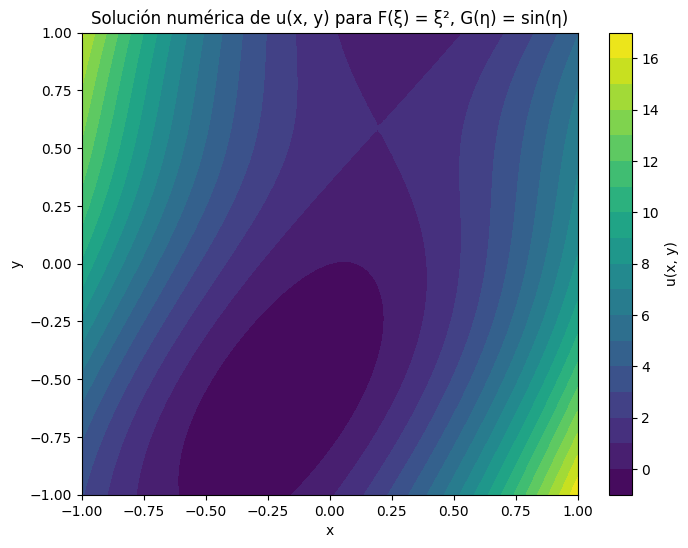

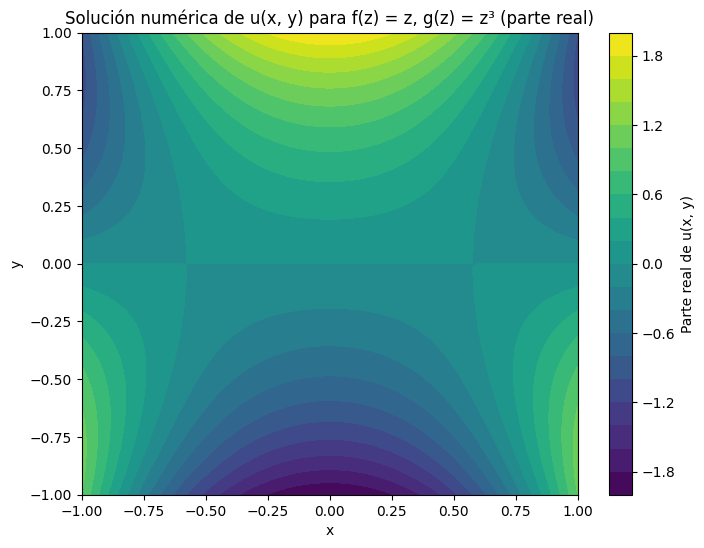

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Problema 1: Solución general de 3u_xx + 10u_xy + 3u_yy = 0
x, y = sp.symbols('x y')
F = sp.Function('F')
G = sp.Function('G')

# La solución general es u(x, y) = F(y - 3x) + G(3y - x)
xi = y - 3*x
eta = 3*y - x
u = F(xi) + G(eta)
print("Solución general del Problema 1:")
print(f"u(x, y) = F({xi}) + G({eta})")

# Verificación
u_xx = sp.diff(u, x, 2)
u_xy = sp.diff(u, x, y)
u_yy = sp.diff(u, y, 2)
eq = 3*u_xx + 10*u_xy + 3*u_yy
print("Verificación (debe ser 0):", eq.simplify())

# Problema 2: u_x + u_yy = 0
# Proponemos una solución u(x, y) = f(y + ix) + g(y - ix)
f = sp.Function('f')
g = sp.Function('g')
z1 = y + sp.I*x
z2 = y - sp.I*x
u2 = f(z1) + g(z2)
print("\nSolución general del Problema 2:")
print(f"u(x, y) = f({z1}) + g({z2})")

# Verificación
u2_x = sp.diff(u2, x)
u2_yy = sp.diff(u2, y, 2)
eq2 = u2_x + u2_yy
print("Verificación (debe ser 0):", eq2.simplify())

# Visualización numérica (ejemplo para Problema 1)
# Supongamos F(z) = z^2, G(z) = sin(z)
X, Y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
XI = Y - 3*X
ETA = 3*Y - X
U = XI**2 + np.sin(ETA) # Completamos esta línea: F(z) = z^2 y G(z) = sin(z)

# Hacemos el gráfico para el Problema 1
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, U, levels=20, cmap='viridis')
plt.colorbar(label='u(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución numérica de u(x, y) para F(ξ) = ξ², G(η) = sin(η)')

# Visualización numérica (ejemplo para Problema 2)
# Supongamos f(z) = z, g(z) = z^3 (usamos solo la parte real porque z es complejo)
Z1 = Y + 1j*X # y + ix
Z2 = Y - 1j*X # y - ix
U2 = Z1 + Z2**3 # f(z) = z, g(z) = z^3
U2_real = np.real(U2) # Tomamos la parte real para graficar

# Hacemos el gráfico para el Problema 2
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, U2_real, levels=20, cmap='viridis')
plt.colorbar(label='Parte real de u(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución numérica de u(x, y) para f(z) = z, g(z) = z³ (parte real)')

In [ ]:
import sympy as sp

# Variables originales
x, y = sp.symbols('x y')
U = sp.Function('U')(x, y)

# Nuevas variables
xi, eta = sp.symbols('xi eta')
V = sp.Function('V')(xi, eta)

# Definimos el cambio de variables
xi_expr = 2*x + y
eta_expr = x - 2*y

# Invertimos el sistema: x, y en función de xi, eta
sol = sp.solve([xi - (2*x + y), eta - (x - 2*y)], (x, y))
x_subs = sol[x]
y_subs = sol[y]

# Reemplazamos en V(xi, eta)
V_expr = V.subs({xi: xi_expr, eta: eta_expr})

# Derivadas parciales usando regla de la cadena
Ux = sp.diff(V_expr, x)
Uy = sp.diff(V_expr, y)
Uxx = sp.diff(Ux, x)
Uxy = sp.diff(Ux, y)
Uyy = sp.diff(Uy, y)

# Sustituimos en la EDP
EDP = Uxx - 4*Uxy + 4*Uyy + 2*Ux + Uy + V_expr

# Simplificamos
EDP_simplificada = sp.simplify(EDP)

# Mostrar resultados
print("Ecuación transformada en coordenadas (x, y):")
sp.pprint(EDP_simplificada)

Ecuación transformada en coordenadas (x, y):
                                                              ⎛  2             ↪
                        ⎛ ∂                 ⎞│                ⎜ ∂              ↪
V(2⋅x + y, x - 2⋅y) + 5⋅⎜───(V(ξ₁, x - 2⋅y))⎟│           + 25⋅⎜────(V(2⋅x + y, ↪
                        ⎝∂ξ₁                ⎠│ξ₁=2⋅x + y      ⎜   2            ↪
                                                              ⎝∂ξ₂             ↪

↪      ⎞│          
↪      ⎟│          
↪  ξ₂))⎟│          
↪      ⎟│          
↪      ⎠│ξ₂=x - 2⋅y
